In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:
def get_data_mini_maml(setting, step, moving_step=5, test_zero = False):
    setting, step = setting
    temp = list()
    seeds = [1,2,3]
    for seed in seeds:
        try: 
            if test_zero: foldername = "./results/miniimagenet/training_stage_zeroing//mini_5w1s_FO_{}_us{}_seed{}/test_zero_E6S2400.csv".format(setting, step, seed)
            else: foldername = "./results/miniimagenet/training_stage_zeroing/mini_5w1s_FO_{}_us{}_seed{}/test_E6S2400.csv".format(setting, step, seed)
            data = pd.read_csv(foldername).values[:78,step]
            temp.append(data)
        except: 
            pass
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

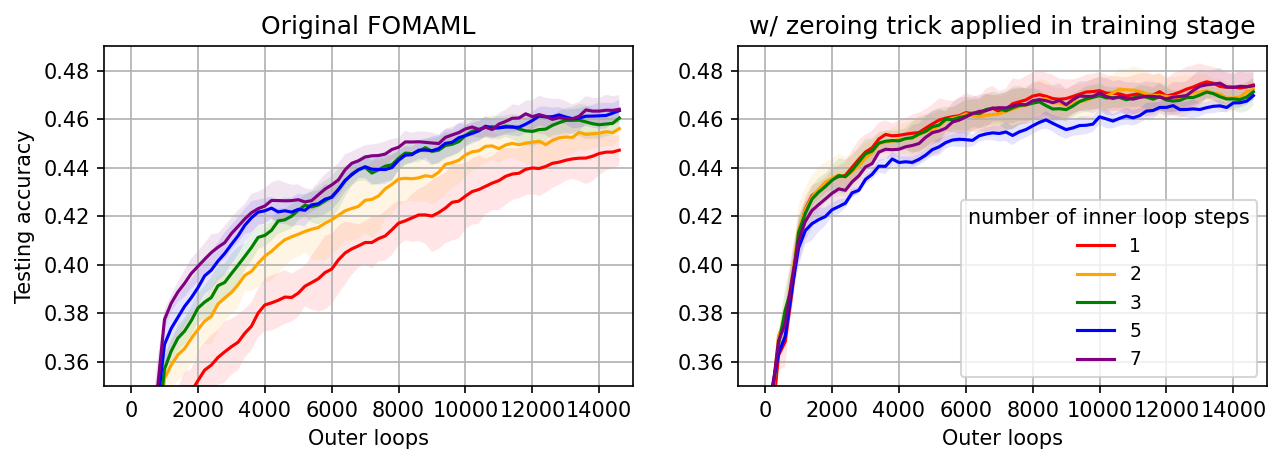

In [3]:
labels = [0, 1]
colors = ["red", "orange", "green", "blue", "purple"]
types = ["zero", "init1"]
legend_titles = [r"number of inner loop steps", "", "", ""]
fill_color = True
fig, axes = plt.subplots(1,2,figsize=(10,3), sharex=False, dpi=150)

for index, step in enumerate([1,2,3,5,7]):
    mean, std = get_data_mini_maml([types[1], step], 3, test_zero = True)
    axes[0].plot(np.arange(len(mean))*200, mean, label=str(step), c=colors[index])
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor=colors[index], alpha=0.1)
        
for index, step in enumerate([1,2,3,5,7]):
    mean, std = get_data_mini_maml([types[0], step], 3, test_zero = True)
    axes[1].plot(np.arange(len(mean))*200, mean, label=str(step), c=colors[index])
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor=colors[index], alpha=0.1)

titles = ["Original FOMAML", 
          "w/ zeroing trick applied in training stage", ]
        
for i in range(2):
    axes[i].set_title(titles[i])
    axes[i].grid()
    axes[i].set_ylim([0.35,0.49])
    axes[i].set_xlim([-800,15000]) 

axes[i].legend(title=legend_titles[0], title_fontsize=10, fontsize=9)
axes[0].set_ylabel("Testing accuracy")
axes[0].set_xlabel("Outer loops")
axes[1].set_xlabel("Outer loops")

plt.savefig("./images/mini_update_steps_20220301.pdf", bbox_inches='tight')